In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('Housing.csv')

In [18]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [19]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [20]:
df = df.dropna()

In [41]:
df

,price,area,bedrooms,bathrooms,guestroom,hotwaterheating,airconditioning,parking,furnishingstatus,heat_air_conditioning
0,13300000,7420,4,2,no,0,1,2,furnished,1
1,12250000,8960,4,4,no,0,1,3,furnished,1
2,12250000,9960,3,2,no,0,0,2,semi-furnished,0
3,12215000,7500,4,2,no,0,1,3,furnished,1
4,11410000,7420,4,1,yes,0,1,2,furnished,1
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,no,0,0,2,unfurnished,0
541,1767150,2400,3,1,no,0,0,0,semi-furnished,0
542,1750000,3620,2,1,no,0,0,0,unfurnished,0
543,1750000,2910,3,1,no,0,0,0,furnished,0


In [22]:
df = df.drop(['stories','mainroad','basement','prefarea'],axis=1)

In [31]:
df['airconditioning'].dtype

dtype('int64')

In [26]:
df['hotwaterheating'].replace({'yes':1,'no':0},inplace=True)
df['airconditioning'].replace({'yes':1,'no':0},inplace=True)

C:\Users\agnik\AppData\Local\Temp\ipykernel_33652\1430501242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['airconditioning'].replace({'yes':1,'no':0},inplace=True)
C:\Users\agnik\AppData\Local\Temp\ipykernel_33652\1430501242.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['aircondit

In [33]:
def waterHeating_and_Airconditioning(input1,input2):
    return input1 + input2

In [36]:
df['heat_air_conditioning'] = waterHeating_and_Airconditioning(df['hotwaterheating'],df['airconditioning'])

In [43]:
df.drop(['airconditioning','hotwaterheating'],axis = 1,inplace = True)

In [44]:
df

,price,area,bedrooms,bathrooms,guestroom,parking,furnishingstatus,heat_air_conditioning
0,13300000,7420,4,2,no,2,furnished,1
1,12250000,8960,4,4,no,3,furnished,1
2,12250000,9960,3,2,no,2,semi-furnished,0
3,12215000,7500,4,2,no,3,furnished,1
4,11410000,7420,4,1,yes,2,furnished,1
...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,no,2,unfurnished,0
541,1767150,2400,3,1,no,0,semi-furnished,0
542,1750000,3620,2,1,no,0,unfurnished,0
543,1750000,2910,3,1,no,0,furnished,0


In [45]:
df['guestroom'].replace({'yes':1,'no':0},inplace=True)

def guest_Bed_Bath(guest,bed,bath):
    return guest + bed + bath

C:\Users\agnik\AppData\Local\Temp\ipykernel_33652\2711595577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['guestroom'].replace({'yes':1,'no':0},inplace=True)
C:\Users\agnik\AppData\Local\Temp\ipykernel_33652\2711595577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom'].rep

In [46]:
df['BHK'] = guest_Bed_Bath(df['bedrooms'],df['bathrooms'],df['guestroom'])

In [49]:
df['furnishingstatus'].replace({"furnished":1,"semi-furnished":2,"unfurnished":3},inplace=True)

C:\Users\agnik\AppData\Local\Temp\ipykernel_33652\3126837475.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'].replace({"furnished":1,"semi-furnished":2,"unfurnished":3},inplace=True)


In [50]:
df.head()

,price,area,bedrooms,bathrooms,guestroom,parking,furnishingstatus,heat_air_conditioning,BHK
0,13300000,7420,4,2,0,2,1,1,6
1,12250000,8960,4,4,0,3,1,1,8
2,12250000,9960,3,2,0,2,2,0,5
3,12215000,7500,4,2,0,3,1,1,6
4,11410000,7420,4,1,1,2,1,1,6


In [52]:
df.drop(['bedrooms','bathrooms','guestroom'],axis=1,inplace = True)

In [53]:
df.head()

,price,area,parking,furnishingstatus,heat_air_conditioning,BHK
0,13300000,7420,2,1,1,6
1,12250000,8960,3,1,1,8
2,12250000,9960,2,2,0,5
3,12215000,7500,3,1,1,6
4,11410000,7420,2,1,1,6


In [77]:
df

,price,area,parking,furnishingstatus,heat_air_conditioning,BHK
0,13300000,7420,2,1,1,6
1,12250000,8960,3,1,1,8
2,12250000,9960,2,2,0,5
3,12215000,7500,3,1,1,6
4,11410000,7420,2,1,1,6
...,...,...,...,...,...,...
540,1820000,3000,2,3,0,3
541,1767150,2400,0,2,0,4
542,1750000,3620,0,3,0,3
543,1750000,2910,0,1,0,4


In [78]:
df.to_csv('Housing1.csv')

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('price',axis = 1),df.price,test_size=0.2)

In [81]:
from sklearn.linear_model import LinearRegression


In [85]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
predictions


array([2853737.46317618, 3081922.1580418 , 5020766.59922589,
       3014522.606251  , 8968071.05843137, 5749560.20425509,
       5755811.40707235, 4255702.3871309 , 4040851.85712437,
       3835415.78438905, 2977883.30247381, 6133855.28671658,
       5083522.90288246, 4687797.60624273, 3774688.23637079,
       6800890.65939332, 5851821.27658574, 3539746.4264523 ,
       3613278.76844659, 5402161.55340047, 6925020.79487327,
       6366730.67822333, 7267574.46768829, 7522944.74688541,
       3272619.63512909, 5110659.38235349, 2800821.17319243,
       6632179.00171551, 2913295.61164431, 3730443.90353959,
       3349048.94936501, 3289878.75147759, 8483059.5493358 ,
       4540631.71314978, 3523384.32896541, 4681330.16936988,
       4440505.10463693, 4513818.21891944, 2913295.61164431,
       5589293.07823116, 4780316.32395328, 2608360.11699379,
       3987018.24567685, 3250209.85871904, 4997338.68625404,
       4020845.68849273, 3672412.95991415, 5517871.80981422,
       5644676.59073125,

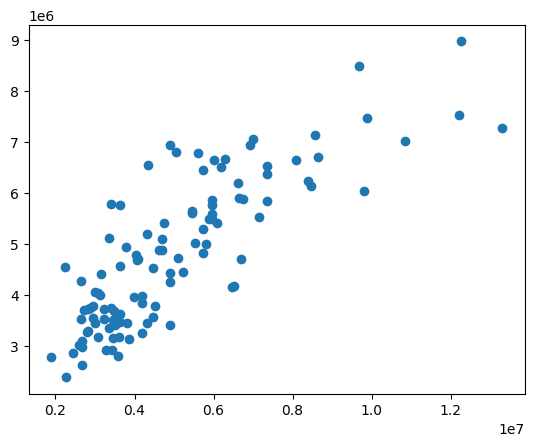

In [84]:
plt.scatter(y_test,predictions)

In [86]:
lr.score(X_test,y_test)

0.6299335840484384

In [95]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=100)
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.7482318944244221

In [96]:
import pickle

filename = 'housing_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(rfr, file)